<a href="https://colab.research.google.com/github/spadade/Capstone_Humana/blob/master/Final_Exploratory_Data_Analysis_HUMANA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# Libraries Imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

%matplotlib inline
plt.style.use('bmh')

# To display multiple outputs in a cell

from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

print("Libraries Imported")

Libraries Imported


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Exploratory Data Analysis

In [ ]:
# Importing Dataset in the Environment
data = pd.read_csv('/2020_Competition_Training (1).csv', index_col=None, na_values=['NA'], sep=',', low_memory=False)

print("Data Imported")

Data Imported


In [ ]:
# Generalized Information of the Dataset.
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69572 entries, 0 to 69571
Columns: 826 entries, person_id_syn to submcc_rsk_chol_ind
dtypes: float64(443), int64(361), object(22)
memory usage: 438.4+ MB


In [ ]:
# Glimpse of top 5 entires of the dataset.
df.head()

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,...,submcc_inf_othr_ind,submcc_dig_liv_ind,submcc_gus_kub_ind,submcc_brn_acc_ind,submcc_dia_othr_ind,submcc_cer_hem_ind,submcc_ben_othr_ind,submcc_inj_drug_ind,submcc_rsk_fh/ho_ind,betos_y2_ind,rx_gpi2_52_ind,submcc_inf_myco_ind,submcc_rar_par_ind,submcc_rsk_an_ind,submcc_rar_hem_ind,rx_gpi2_48_ind,betos_m1b_ind,rx_gpi2_57_ind,rx_gpi2_09_ind,rx_gpi2_55_ind,submcc_sor_eye_ind,submcc_hiv_kapo_ind,submcc_cad_mi_ind,rx_gpi2_73_ind,rx_gpi2_15_ind,rx_gpi2_70_ind,rx_gpi2_88_ind,submcc_res_alg_ind,submcc_can_lymp_ind,submcc_mus_arth_ind,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
0,0002MOb79ST17bLYAe46eIc2,0,EM,F,62,1,0,ENG,UNK,3.0,1,2,0,0.0,0.0,1.162658,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0004cMOS6bTLf34Y7AIca8f3,0,EM,F,59,1,0,ENG,C2,1.0,2,5,3,0.0,0.0,1.155124,0.0,0.0,0.085593,0.085873,0.00,0.0,0.000000,0.000000,0.175142,0.000000,0.000000,0.090370,0.0,0.0,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,000536M9O3ST98LaYaeA29Ia,1,EM,F,63,0,0,ENG,UNK,3.0,0,6,0,0.0,0.0,0.333333,0.0,0.0,0.133333,0.083333,1.25,0.0,0.166667,0.083333,0.000000,0.166667,0.083333,0.250000,0.0,0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0009bMO9SfTLYe77A51I4ac3,0,EM,M,75,0,0,ENG,H6,3.0,0,2,0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.083333,0.00,0.0,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.0,0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,000M7OeS66bTL8bY89Aa16Ie,0,EM,M,51,1,0,ENG,UNK,3.0,1,4,0,0.0,0.0,0.083333,0.0,0.0,0.000000,0.000000,0.00,0.0,0.083333,0.000000,0.166667,0.166667,0.000000,0.250000,0.0,0.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Glimpse of last 5 entires of the dataset.
df.tail()

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,...,submcc_inf_othr_ind,submcc_dig_liv_ind,submcc_gus_kub_ind,submcc_brn_acc_ind,submcc_dia_othr_ind,submcc_cer_hem_ind,submcc_ben_othr_ind,submcc_inj_drug_ind,submcc_rsk_fh/ho_ind,betos_y2_ind,rx_gpi2_52_ind,submcc_inf_myco_ind,submcc_rar_par_ind,submcc_rsk_an_ind,submcc_rar_hem_ind,rx_gpi2_48_ind,betos_m1b_ind,rx_gpi2_57_ind,rx_gpi2_09_ind,rx_gpi2_55_ind,submcc_sor_eye_ind,submcc_hiv_kapo_ind,submcc_cad_mi_ind,rx_gpi2_73_ind,rx_gpi2_15_ind,rx_gpi2_70_ind,rx_gpi2_88_ind,submcc_res_alg_ind,submcc_can_lymp_ind,submcc_mus_arth_ind,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
69567,ffe33MOS25dTf027LaY7A5I3,0,EM,F,72,1,0,ENG,H7,5.0,2,2,2,0.0,0.0,1.250000,0.0,0.0,0.166667,0.083333,0.000000,0.0,0.250000,0.000000,0.250000,0.500000,0.0,0.916667,0.250000,0.0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
69568,fff1M4O1cfST49LY464A2Ieb,0,EM,M,75,0,0,ENG,C4,9.0,3,2,14,0.0,0.0,1.668168,0.0,0.0,0.000000,0.332639,0.000000,0.0,0.252794,0.000000,0.449687,0.735747,0.0,0.627186,0.346925,0.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
69569,fff5MO7e401STLYcAd8e581I,0,EM,M,76,0,0,ENG,H6,6.0,2,4,7,0.0,0.0,0.666667,0.0,0.0,0.083333,0.000000,0.083333,0.0,0.000000,0.083333,0.416667,0.166667,0.0,0.166667,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
69570,fffMc37OSfTLfY7853dfA09I,0,LV,M,67,0,1,ENG,H6,2.0,0,2,0,0.0,0.0,0.116657,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.083333,0.250000,0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
69571,fffc14bbMOfSTb7eLY5AI14d,1,EM,M,60,0,0,ENG,UNK,2.0,3,2,0,0.0,0.0,0.288073,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.205000,0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Columns in the Dataset.
df.columns

Index(['person_id_syn', 'transportation_issues', 'src_platform_cd', 'sex_cd',
       'est_age', 'smoker_current_ind', 'smoker_former_ind', 'lang_spoken_cd',
       'mabh_seg', 'cci_score',
       ...
       'submcc_rar_scl_ind', 'rx_gpi2_74_ind', 'rx_gpi2_89_ind',
       'rx_gpi2_96_ind', 'submcc_rsk_obe_ind', 'rx_gpi2_22_ind',
       'submcc_rsk_synx_ind', 'submcc_rsk_coag_ind', 'submcc_rsk_othr_ind',
       'submcc_rsk_chol_ind'],
      dtype='object', length=826)

In [ ]:
# The dimension of the Dataset is 69572 observations with 826 variables.
df.shape

(69572, 826)

In [ ]:
# Checking the NULL (missing values) columns from the dataset.
df.columns[df.isnull().any()]

Index(['cms_ma_risk_score_nbr', 'cms_partd_ra_factor_amt',
       'cms_ra_factor_type_cd', 'cms_risk_adj_payment_rate_a_amt',
       'cms_risk_adj_payment_rate_b_amt', 'cms_risk_adjustment_factor_a_amt',
       'cms_rx_risk_score_nbr', 'cms_tot_ma_payment_amt',
       'cms_tot_partd_payment_amt', 'cons_cmys',
       ...
       'credit_prcnt_nonagnfirstmtg', 'hedis_ami', 'hedis_cmc_ldc_c_control',
       'hedis_cmc_ldc_c_screen', 'hedis_dia_eye', 'hedis_dia_hba1c_ge9',
       'hedis_dia_hba1c_test', 'hedis_dia_ldc_c_control',
       'hedis_dia_ldc_c_screen', 'hedis_dia_ma_nephr'],
      dtype='object', length=131)

In [ ]:
# Checking missing values are present or not
df.isnull().values.any()

True

In [ ]:
# Summary of the dataset
df.describe(include='all')

,person_id_syn,transportation_issues,src_platform_cd,sex_cd,est_age,smoker_current_ind,smoker_former_ind,lang_spoken_cd,mabh_seg,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,...,submcc_inf_othr_ind,submcc_dig_liv_ind,submcc_gus_kub_ind,submcc_brn_acc_ind,submcc_dia_othr_ind,submcc_cer_hem_ind,submcc_ben_othr_ind,submcc_inj_drug_ind,submcc_rsk_fh/ho_ind,betos_y2_ind,rx_gpi2_52_ind,submcc_inf_myco_ind,submcc_rar_par_ind,submcc_rsk_an_ind,submcc_rar_hem_ind,rx_gpi2_48_ind,betos_m1b_ind,rx_gpi2_57_ind,rx_gpi2_09_ind,rx_gpi2_55_ind,submcc_sor_eye_ind,submcc_hiv_kapo_ind,submcc_cad_mi_ind,rx_gpi2_73_ind,rx_gpi2_15_ind,rx_gpi2_70_ind,rx_gpi2_88_ind,submcc_res_alg_ind,submcc_can_lymp_ind,submcc_mus_arth_ind,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
count,69572,69572.000000,69572,69572,69572.000000,69572.000000,69572.000000,69572,69572,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,...,69572.000000,69572.000000,69572.000000,69572.0,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.0,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.0,69572.000000,69572.000000,69572.000000,69572.0,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.000000,69572.0,69572.000000,69572.000000,69572.000000,69572.000000,69572.0,69572.000000
unique,69572,NaN,2,2,NaN,NaN,NaN,3,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2MO0cafSTL57c1151YA91aI7,NaN,EM,F,NaN,NaN,NaN,ENG,H2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,49999,41112,NaN,NaN,NaN,63905,16418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.146568,NaN,NaN,70.815673,0.134824,0.144368,NaN,NaN,4.708029,1.778963,3.330535,2.681251,0.039526,0.007197,0.651291,0.006282,0.022056,0.066834,0.100651,0.064777,0.022587,0.121506,0.034734,0.203925,0.186862,0.027639,0.321049,0.086083,0.061702,0.011312,0.176996,0.029796,0.028963,0.053139,0.154789,0.246651,0.008509,0.018959,0.001049,...,0.182976,0.054088,0.264604,0.0,0.328868,0.002645,0.171075,0.068346,0.215058,0.061706,0.020612,0.000129,0.003392,0.0,0.000474,0.000719,0.934615,0.145605,0.000302,0.005922,0.561433,0.0,0.008639,0.030300,0.000057,0.0,0.030443,0.120523,0.002875,0.333755,0.000029,0.000014,0.001854,0.0,0.446918,0.210286,0.001466,0.000920,0.0,0.711536
std,NaN,0.353677

In [ ]:
# Counting number of missing values
countofnulls = df.isnull().sum().sum()
countofnulls

512802

In [ ]:
# Counting total elements in the dataset
totalelements = df.count().sum()
totalelements

56953670

In [ ]:
# There are total 0.9% missing values in the dataset
percentageofnulls=(countofnulls/totalelements) * 100
percentageofnulls

0.9003844703949718

In [ ]:
# Checking any duplicates observations in the dataset
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [person_id_syn, transportation_issues, src_platform_cd, sex_cd, est_age, smoker_current_ind, smoker_former_ind, lang_spoken_cd, mabh_seg, cci_score, dcsi_score, fci_score, hcc_weighted_sum, betos_d1c_pmpm_ct, betos_d1d_pmpm_ct, betos_m1b_pmpm_ct, betos_m2c_pmpm_ct, betos_m5b_pmpm_ct, betos_m5c_pmpm_ct, betos_m5d_pmpm_ct, betos_o1a_pmpm_ct, betos_o1b_pmpm_ct, betos_o1e_pmpm_ct, betos_o1g_pmpm_ct, betos_t1a_pmpm_ct, betos_t1b_pmpm_ct, betos_t1e_pmpm_ct, betos_t1h_pmpm_ct, betos_t2a_pmpm_ct, betos_y2_pmpm_ct, bh_adtp_ind, bh_aoth_ind, bh_bipr_ind, bh_cdal_ind, bh_cdsb_ind, bh_cdto_ind, bh_dema_ind, ccsp_014_ind, ccsp_020_ind, ccsp_021_ind, ccsp_034_ind, ccsp_060_ind, ccsp_062_ind, ccsp_080_ind, ccsp_107_ind, ccsp_120_ind, ccsp_125_ind, ccsp_130_ind, ccsp_163_ind, ccsp_169_ind, ccsp_204_ind, ccsp_205_ind, ccsp_212_ind, ccsp_220_ind, ccsp_228_ind, ccsp_236_ind, ccsp_239_ind, ccsp_242_ind, cms_disabled

In [ ]:
# Finding the unique values in transportation_issues variables
# 0 - Having no transportation issues
# 1 - Having transportation issues
pd.unique(df.transportation_issues)

array([0, 1])

In [ ]:
# Correlation values 
df.corr(method='pearson')

,transportation_issues,est_age,smoker_current_ind,smoker_former_ind,cci_score,dcsi_score,fci_score,hcc_weighted_sum,betos_d1c_pmpm_ct,betos_d1d_pmpm_ct,betos_m1b_pmpm_ct,betos_m2c_pmpm_ct,betos_m5b_pmpm_ct,betos_m5c_pmpm_ct,betos_m5d_pmpm_ct,betos_o1a_pmpm_ct,betos_o1b_pmpm_ct,betos_o1e_pmpm_ct,betos_o1g_pmpm_ct,betos_t1a_pmpm_ct,betos_t1b_pmpm_ct,betos_t1e_pmpm_ct,betos_t1h_pmpm_ct,betos_t2a_pmpm_ct,betos_y2_pmpm_ct,bh_adtp_ind,bh_aoth_ind,bh_bipr_ind,bh_cdal_ind,bh_cdsb_ind,bh_cdto_ind,bh_dema_ind,ccsp_014_ind,ccsp_020_ind,ccsp_021_ind,ccsp_034_ind,ccsp_060_ind,ccsp_062_ind,ccsp_080_ind,ccsp_107_ind,...,submcc_inf_othr_ind,submcc_dig_liv_ind,submcc_gus_kub_ind,submcc_brn_acc_ind,submcc_dia_othr_ind,submcc_cer_hem_ind,submcc_ben_othr_ind,submcc_inj_drug_ind,submcc_rsk_fh/ho_ind,betos_y2_ind,rx_gpi2_52_ind,submcc_inf_myco_ind,submcc_rar_par_ind,submcc_rsk_an_ind,submcc_rar_hem_ind,rx_gpi2_48_ind,betos_m1b_ind,rx_gpi2_57_ind,rx_gpi2_09_ind,rx_gpi2_55_ind,submcc_sor_eye_ind,submcc_hiv_kapo_ind,submcc_cad_mi_ind,rx_gpi2_73_ind,rx_gpi2_15_ind,rx_gpi2_70_ind,rx_gpi2_88_ind,submcc_res_alg_ind,submcc_can_lymp_ind,submcc_mus_arth_ind,submcc_rar_scl_ind,rx_gpi2_74_ind,rx_gpi2_89_ind,rx_gpi2_96_ind,submcc_rsk_obe_ind,rx_gpi2_22_ind,submcc_rsk_synx_ind,submcc_rsk_coag_ind,submcc_rsk_othr_ind,submcc_rsk_chol_ind
transportation_issues,1.000000,-0.182090,0.099859,-0.014584,-0.010039,0.052572,0.103049,0.028337,0.037055,0.039303,0.054548,0.030744,0.048721,-0.027743,0.018815,0.094024,-0.016510,0.039575,-0.008605,0.004058,0.063662,0.051760,0.044908,0.071568,0.054087,0.060969,0.079773,0.096129,0.048872,0.085542,0.102990,0.104171,0.006740,0.001096,-0.000878,NaN,0.004927,0.013523,0.002856,0.010231,...,0.046374,0.027035,0.031125,NaN,0.037676,0.013477,-0.044081,0.044785,-0.009293,0.069382,0.039423,-0.004714,0.009373,NaN,0.009637,0.001019,-0.022238,0.067898,0.009176,0.008271,-0.041027,NaN,0.006549,0.036047,0.007578,NaN,0.003920,-0.006362,-0.001756,0.031087,0.012938,-0.001571,0.003866,NaN,0.043060,0.025502,-0.005258,0.006193,NaN,-0.026332
est_age,-0.182090,1.000000,-0.171495,0.064805,0.409230,0.148596,0.004075,0.142295,0.001945,-0.007587,-0.030883,-0.016914,-0.088408,0.114199,0.017812,-0.053451,0.019087,-0.029784,0.018349,0.047273,-0.034488,-0.047640,-0.023066,0.006427,0.043819,-0.103984,-0.096851,-0.157173,-0.055516,-0.100502,-0.174464,-0.115062,0.026065,0.060462,0.001170,NaN,0.000702,0.026946,0.000060,-0.002480,...,-0.021991,-0.033284,0.043413,NaN,0.000204,-0.000862,0.042418,-0.024806,0.036504,0.054959,-0.040998,0.002385,0.003049,NaN,-0.006268,0.007013,0.079009,-0.111450,-0.004141,-0.008381,0.136879,NaN,0.015786,-0.036186,-0.002777,NaN,-0.010742,-0.001417,0.014841,0.034293,0.000095,0.000795,-0.001130,NaN,-0.074695,-0.031476,0.000786,-0.005061,NaN,0.119659
smoker_current_ind,0.099859,-0.171495,1.000000,-0.162033,0.032805,0.079364,0.139417,0.070619,0.084098,0.018014,0.095154,0.065025,0.041595,-0.045594,0.045710,0.041276,-0.015568,0.054248,0.016956,0.046042,0.096852,0.040755,0.066306,0.113118,0.023790,0.051691,0.105170,0.082551,0.106737,0.108173,0.918613,0.113879,-0.008163,-0.015069,-0.003695,NaN,0.022136,0.043860,0.012166,0.006311,...,0.045899,0.041427,0.045796,NaN,0.022952,0.018185,-0.004099,0.058692,0.007658,0.048483,0.039295,-0.004490,0.016055,NaN,0.002997,0.006688,0.039210,0.087489,0.005254,-0.000300,-0.034454,NaN,0.029092,0.039232,0.013658,NaN,0.012111,0.001874,0.004744,0.022614,-0.002117,-0.001497,0.006464,NaN,0.007610,0.067078,0.001373,0.000515,NaN,0.023018
smoker_former_ind,-0.014584,0.064805,-0.162033,1.000000,0.143096,0.125453,0.128855,0.117036,0.078879,0.026093,0.115364,0.024943,-0.000775,0.021945,0.047758,0.013491,0.006715,0.068883,0.035275,0.098812,0.106260,0.031591,0.093550,0.134014,0.051265,0.000534,0.030351,-0.008725,0.022459,0.002237,-0.144352,0.035638,0.011814,0.013967,0.000582,NaN,0.013641,0.055242,0.004387,0.011617,...,0.048781,0.030329,0.071695,NaN,0.043077,0.005921,0.027772,0.064427,0.053149,0.081960,0.016112,0.006116,0.009094,Na

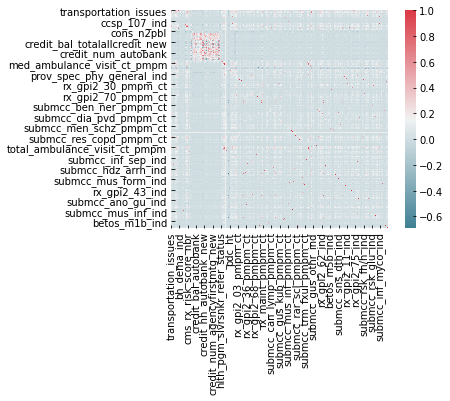

In [ ]:
# Visulaizing the correlation 
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True)

Text(0.5, 1.0, 'Gender Statistics w.r.t. Transportation Issues')

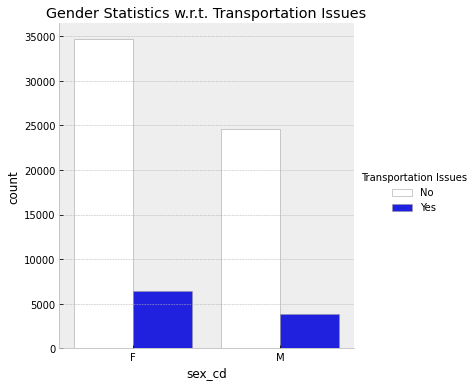

In [ ]:
# Visulaizing the gender statistics with respect to target variable(transportation_issues)
g = sns.catplot(x="sex_cd", hue="transportation_issues", kind="count",
            palette="flag", edgecolor=".6",
            data=df)

# title
new_title = 'Transportation Issues'
g._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

import matplotlib.pyplot as plt

plt.title('Gender Statistics w.r.t. Transportation Issues')


In [ ]:
# Information about zipcodes and their respective transportation issues.
pd.crosstab(df.zip_cd,df.transportation_issues)

transportation_issues,0,1
zip_cd,,
00767,11,5
23060,28,3
23111,13,0
23223,20,1
23224,20,3
...,...,...
98226,8,6
98270,25,3
98661,16,3


Text(0.5, 1.0, 'Disability Statistics w.r.t. Transportation Issues')

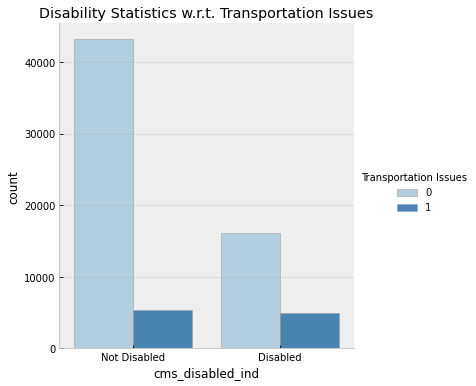

In [ ]:
# Visulaizing the Disability statistics with respect to target variable(transportation_issues)
p = sns.catplot(x="cms_disabled_ind", hue="transportation_issues", kind="count",
            palette="Blues", edgecolor=".6",
            data=df)

# title
new_title = 'Transportation Issues'
p._legend.set_title(new_title)
# replace labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
p.set_xticklabels( ('Not Disabled', 'Disabled') )

import matplotlib.pyplot as plt

plt.title('Disability Statistics w.r.t. Transportation Issues')

0    59375
1    10197
Name: transportation_issues, dtype: int64

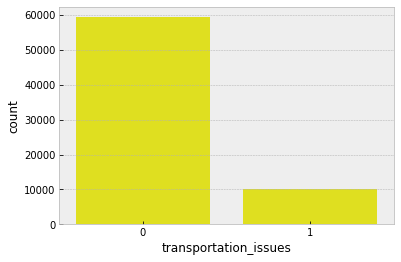

In [ ]:
#Count of each "transportation_issues" variable
df.transportation_issues.value_counts()

#Visualize the "Class" variable

sns.countplot(x='transportation_issues', data=df, color= 'yellow')
# By visualization data is imbalanced data 

# Data Preprocessing

In [ ]:
# Extracting columns with Float datatype.

df_float = df.select_dtypes(include=[np.float])

df_float.head

<bound method NDFrame.head of        cci_score  ...  total_urgent_care_visit_ct_pmpm
0            3.0  ...                              0.0
1            1.0  ...                              0.0
2            3.0  ...                              0.0
3            3.0  ...                              0.0
4            3.0  ...                              0.0
...          ...  ...                              ...
69567        5.0  ...                              0.0
69568        9.0  ...                              0.0
69569        6.0  ...                              0.0
69570        2.0  ...                              0.0
69571        2.0  ...                              0.0

[69572 rows x 443 columns]>

In [ ]:
# Fill missing values with median column values of float
df_float_impute = df_float.fillna(df_float.median())

# Checking if the imputations of missing value is implemented correctly.
df_float_impute.isnull().values.any()

False

In [ ]:
# Extracting columns with Integer datatype.

df_int64 = df.select_dtypes(include=[np.int64])

df_int64.head

<bound method NDFrame.head of        transportation_issues  est_age  ...  submcc_rsk_othr_ind  submcc_rsk_chol_ind
0                          0       62  ...                    0                    0
1                          0       59  ...                    0                    1
2                          1       63  ...                    0                    1
3                          0       75  ...                    0                    1
4                          0       51  ...                    0                    1
...                      ...      ...  ...                  ...                  ...
69567                      0       72  ...                    0                    1
69568                      0       75  ...                    0                    1
69569                      0       76  ...                    0                    1
69570                      0       67  ...                    0                    0
69571                      1       

In [ ]:
# Fill missing values with median column values of interger datatype.

df_int64_impute = df_int64.fillna(df_int64.median())

# Checking if the imputations of missing value is implemented correctly.
df_int64_impute.isnull().values.any()

False

In [ ]:
# Extracting columns with Object datatype.

df_object = df.select_dtypes(include=[np.object])

# Eliminating the Person_ID column from the Dataframe.
df_object = df_object.drop('person_id_syn', axis=1)

df_object.head

<bound method NDFrame.head of       src_platform_cd sex_cd lang_spoken_cd  ... zip_cd cnty_cd state_cd
0                  EM      F            ENG  ...  other   other    other
1                  EM      F            ENG  ...  other   other    other
2                  EM      F            ENG  ...  other   other    other
3                  EM      M            ENG  ...  other   other    other
4                  EM      M            ENG  ...  other   other    other
...               ...    ...            ...  ...    ...     ...      ...
69567              EM      F            ENG  ...  other   other    other
69568              EM      M            ENG  ...  33437     099       FL
69569              EM      M            ENG  ...  other   other    other
69570              LV      M            ENG  ...  other   other    other
69571              EM      M            ENG  ...  other   other    other

[69572 rows x 21 columns]>

In [ ]:
# Fill missing values with most common element from column values of object datatype.

df_object_commonImpute = df_object.apply(lambda df_object: df_object.fillna(df_object.value_counts().index[0]))

# Checking if the imputations of missing value is implemented correctly.
df_object_commonImpute.isnull().values.any()

False

In [ ]:
# Factorizing the Catagorical Variables.

df_dummies = df_object_commonImpute.apply(lambda x: pd.factorize(x)[0])
df_dummies.head

<bound method NDFrame.head of        src_platform_cd  sex_cd  lang_spoken_cd  ...  zip_cd  cnty_cd  state_cd
0                    0       0               0  ...       0        0         0
1                    0       0               0  ...       0        0         0
2                    0       0               0  ...       0        0         0
3                    0       1               0  ...       0        0         0
4                    0       1               0  ...       0        0         0
...                ...     ...             ...  ...     ...      ...       ...
69567                0       0               0  ...       0        0         0
69568                0       1               0  ...     231       27         1
69569                0       1               0  ...       0        0         0
69570                1       1               0  ...       0        0         0
69571                0       1               0  ...       0        0         0

[69572 rows x 21 colu

In [ ]:
#df_dummies = pd.get_dummies(df_object_commonImpute, drop_first=True)
#df_dummies.shape

# List of your dataframes to concat them together.
pdList = [df_dummies, df_int64_impute, df_float_impute]  
new_df = pd.concat(pdList, axis=1)

new_df.isnull().values.any()

False

In [ ]:
# Checking the Dimension of Combined dataset.
new_df.shape

(69572, 825)

In [ ]:
#Variance Threshold

def variance_threshold_selector(new_df, threshold=0):
    selector = VarianceThreshold(threshold)
    selector.fit(new_df)
    return new_df[new_df.columns[selector.get_support(indices=True)]]

new_h= variance_threshold_selector(new_df,0)
new_h.shape
new_h.columns

(69572, 730)

Index(['src_platform_cd', 'sex_cd', 'lang_spoken_cd', 'mabh_seg',
       'cms_ra_factor_type_cd', 'cons_cmys', 'cons_hhcomp', 'cons_homstat',
       'hedis_ami', 'hedis_cmc_ldc_c_control',
       ...
       'total_ip_acute_admit_days_pmpm', 'total_ip_mhsa_admit_ct_pmpm',
       'total_ip_mhsa_admit_days_pmpm', 'total_ip_rehab_admit_ct_pmpm',
       'total_ip_rehab_admit_days_pmpm', 'total_ip_snf_admit_ct_pmpm',
       'total_ip_snf_admit_days_pmpm', 'total_outpatient_visit_ct_pmpm',
       'total_physician_office_visit_ct_pmpm',
       'total_urgent_care_visit_ct_pmpm'],
      dtype='object', length=730)

In [ ]:
# Splitting the dataset into train and validation sets 
# Training set- 80% of original dataset
# Validation set- 20% of original dataset.

from sklearn.model_selection import train_test_split
X = new_h.drop ('transportation_issues', axis=1)
Y = new_h['transportation_issues']
X_train, X_Valid, Y_train, Y_Valid = train_test_split( X, Y, test_size=0.2, random_state=25, stratify= Y)

print('X Training Dataset Shape: ', X_train.shape)
print('Y Training Dataset Shape: : ', Y_train.shape)

print('X Validation Dataset Shape: ', X_Valid.shape)
print('Y Validation Dataset Shape: : ', Y_Valid.shape)

X Training Dataset Shape:  (55657, 729)
Y Training Dataset Shape: :  (55657,)
X Validation Dataset Shape:  (13915, 729)
Y Validation Dataset Shape: :  (13915,)


In [ ]:
# SMOTE method for balancing data
from imblearn.over_sampling import SMOTE
balance = SMOTE()
bal_Xtrain, bal_Ytrain = balance.fit_resample(X_train, Y_train, )


bal_Xtrain.shape
bal_Ytrain.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(94998, 729)

(94998,)

In [ ]:
# array to dataframe 
new_balX = pd.DataFrame(bal_Xtrain)
# Giving same columns as in X_train
new_balX.columns = X_train.columns
new_balY =pd.DataFrame(bal_Ytrain)
new_balY.value_counts()

1    47499
0    47499
dtype: int64

# Modelling

In [ ]:
# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
('clf', svm.SVC(random_state=42))])

In [ ]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
'clf__C': param_range_fl,
'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
'clf__min_samples_leaf': param_range,
'clf__max_depth': param_range,
'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
'clf__C': param_range}]

In [ ]:
# Construct grid searches 

gs_lr = GridSearchCV(estimator=pipe_lr,
param_grid=grid_params_lr,
scoring='accuracy',
cv=5)

gs_rf = GridSearchCV(estimator=pipe_rf,
param_grid=grid_params_rf,
scoring='accuracy',
cv=5, 
n_jobs=-1)

gs_svm = GridSearchCV(estimator=pipe_svm,
param_grid=grid_params_svm,
scoring='accuracy',
cv=5,
n_jobs=-1)

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''

print ('\nEstimator: %s' % 'Logistic Regression')
# Fit grid search
gs_lr.fit(X_train, Y_train)
# Best params
print('Best params: %s' % gs_lr.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_lr.best_score_)
# Predict on test data with best params
y_pred = gs_lr.predict(X_Valid)
# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_Valid, y_pred))

Performing model optimizations...

Estimator: Logistic Regression


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                

Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.856
Test set accuracy score for best params: 0.856 


In [ ]:
# RF model
print ('\nEstimator: %s' % 'Random Forest')
# Fit grid search
gs_rf.fit(X_train, Y_train)
# Best params
print('Best params: %s' % gs_rf.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_rf.best_score_)
# Predict on test data with best params
y_pred_rf = gs_rf.predict(X_Valid)
# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_Valid, y_pred_rf))


Estimator: Random Forest


In [ ]:
# SVM Model
print ('\nEstimator: %s' % 'Support Vector Machine')
# Fit grid search
gs_svm.fit(X_train, Y_train)
# Best params
print('Best params: %s' % gs_svm.best_params_)
# Best training data accuracy
print('Best training accuracy: %.3f' % gs_svm.best_score_)
# Predict on test data with best params
y_pred_svm = gs_svm.predict(X_Valid)
# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % accuracy_score(Y_Valid, y_pred_svm))

In [ ]:
# Applying XGBoost for balanced dataset (using SMOTE)

print ('\nEstimator: %s' % 'XGBoost for balanced dataset')
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model,bal_Xtrain,bal_Ytrain, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

#fit model 
model.fit(bal_Xtrain, bal_Ytrain)


Estimator: XGBoost for balanced dataset
Mean ROC AUC: 0.95482


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#fit model 
fit = model.fit(new_balX, new_balY)
fit

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# SMOTE method for balancing validation data
from imblearn.over_sampling import SMOTE
balance = SMOTE()
bal_Xval, bal_Yval = balance.fit_resample(X_Valid, Y_Valid )


bal_Xval.shape
bal_Yval.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(23752, 729)

(23752,)

In [ ]:
# array to dataframe 
new_balXval = pd.DataFrame(bal_Xval)
# Giving same columns as in X_train
new_balXval.columns = X_Valid.columns
new_balYval =pd.DataFrame(bal_Yval)
new_balYval.value_counts()

1    11876
0    11876
dtype: int64

In [ ]:
# balanced Validation set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_predict = model.predict(new_balXval)
confusion_matrix(new_balYval, Y_predict)
print(classification_report(new_balYval, Y_predict))



array([[11690,   186],
       [ 1860, 10016]])

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     11876
           1       0.98      0.84      0.91     11876

    accuracy                           0.91     23752
   macro avg       0.92      0.91      0.91     23752
weighted avg       0.92      0.91      0.91     23752



In [ ]:
# unbalanced validation set

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_predict = model.predict(X_Valid)
confusion_matrix(Y_Valid, Y_predict)
print(classification_report(Y_Valid, Y_predict))


array([[11690,   186],
       [ 1840,   199]])

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     11876
           1       0.52      0.10      0.16      2039

    accuracy                           0.85     13915
   macro avg       0.69      0.54      0.54     13915
weighted avg       0.81      0.85      0.81     13915



# Results

In [ ]:
# Importing Dataset in the Environment
data_test = pd.read_csv('/2020_Competition_Holdout .csv', index_col=None, na_values=['NA'], sep=',', low_memory=False)

print("Test Data Imported")

Test Data Imported


In [ ]:
data_test.shape

(17681, 825)

In [ ]:
#Same variables as training dataset
test = data_test.columns.intersection(X_train.columns)
new_test = data_test[test]
new_test.shape


(17681, 729)

In [ ]:
# Separate the categorical variables
df_object = new_test.select_dtypes(include=[np.object])
df_int64 = new_test.select_dtypes(include=[np.int64])

df_float = new_test.select_dtypes(include=[np.float])

In [ ]:
## Factorizing the Catagorical Variables in test dataset

df_dummies1 = df_object.apply(lambda x: pd.factorize(x)[0])
df_dummies1.head

<bound method NDFrame.head of        src_platform_cd  sex_cd  lang_spoken_cd  ...  zip_cd  cnty_cd  state_cd
0                    0       0               0  ...       0        0         0
1                    0       1               0  ...       1        1         1
2                    1       0               1  ...       1        1         1
3                    0       1               0  ...       2        2         0
4                    0       1               0  ...       1        1         1
...                ...     ...             ...  ...     ...      ...       ...
17676                0       0               0  ...     104       24        13
17677                1       0               0  ...       1        1         1
17678                1       1               0  ...       1        1         1
17679                0       1               0  ...     589       37         8
17680                0       1               0  ...       1        1         1

[17681 rows x 21 colu

In [ ]:
new_test1 = new_test.select_dtypes(exclude=['object'])
new_test1.shape


(17681, 708)

In [ ]:
pdList1 = [df_dummies1, df_int64, df_float]  
new_test_final = pd.concat(pdList1, axis=1)
new_test_final.shape

(17681, 729)

In [ ]:
new_test_final.columns

Index(['src_platform_cd', 'sex_cd', 'lang_spoken_cd', 'mabh_seg',
       'cms_ra_factor_type_cd', 'cons_cmys', 'cons_hhcomp', 'cons_homstat',
       'hedis_ami', 'hedis_cmc_ldc_c_control',
       ...
       'total_ip_acute_admit_days_pmpm', 'total_ip_mhsa_admit_ct_pmpm',
       'total_ip_mhsa_admit_days_pmpm', 'total_ip_rehab_admit_ct_pmpm',
       'total_ip_rehab_admit_days_pmpm', 'total_ip_snf_admit_ct_pmpm',
       'total_ip_snf_admit_days_pmpm', 'total_outpatient_visit_ct_pmpm',
       'total_physician_office_visit_ct_pmpm',
       'total_urgent_care_visit_ct_pmpm'],
      dtype='object', length=729)

In [ ]:
new_balX.columns

Index(['src_platform_cd', 'sex_cd', 'lang_spoken_cd', 'mabh_seg',
       'cms_ra_factor_type_cd', 'cons_cmys', 'cons_hhcomp', 'cons_homstat',
       'hedis_ami', 'hedis_cmc_ldc_c_control',
       ...
       'total_ip_acute_admit_days_pmpm', 'total_ip_mhsa_admit_ct_pmpm',
       'total_ip_mhsa_admit_days_pmpm', 'total_ip_rehab_admit_ct_pmpm',
       'total_ip_rehab_admit_days_pmpm', 'total_ip_snf_admit_ct_pmpm',
       'total_ip_snf_admit_days_pmpm', 'total_outpatient_visit_ct_pmpm',
       'total_physician_office_visit_ct_pmpm',
       'total_urgent_care_visit_ct_pmpm'],
      dtype='object', length=729)

In [ ]:
test_predict = model.predict(new_test_final)

test_predict

test_predict_df = pd.DataFrame(test_predict)

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
final_report = pd.concat([data_test['person_id_syn'], test_predict_df], axis=1)

In [ ]:
#Changing the column name 
final_report.columns.values[1] = 'Predicted Value'
final_report.columns
final_report.shape


Index(['person_id_syn', 'Predicted Value'], dtype='object')

(17681, 2)

# Export dataframe to csv - For future reference purpose

final_report.to_csv(r'Round1_Report.csv')